In [104]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


## Data preparation

In [105]:
# df_gdp = pd.read_csv("../gdp_analysis/results/gdp_weighted_pop_fifty.csv")
df_gdp = pd.read_csv("other_data/gdp_weighted_pop_decade.csv")
df_gdp = df_gdp.rename(columns={"region": "region_name"})

#df_cultura = pd.read_csv("../unseen_species_model/results/occupation/raw_results.csv", index_col = [0])
#df_cultura = pd.read_csv("../unseen_species_model/results_50/raw_results.csv", index_col = [0])

# Load Unseen-species data
path = 'unseen_species_model/unseen_species_model.csv'
df_cultura = pd.read_csv(path, index_col = [0])
df_cultura = df_cultura.rename(columns = {'f0_min':'min_f0', 'f0_max':'max_f0'})


df_cultura['N_est'] = df_cultura['f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura = df_cultura.groupby(['region_name', 'decade']).agg({'N_est': 'sum', 'individual_wikidata_id':'count'}).reset_index()
df_cultura = df_cultura.rename(columns={"individual_wikidata_id": "score"})
df_cultura['survival_ratio'] = df_cultura['score']/df_cultura['N_est']

df = pd.merge(df_gdp, df_cultura, on = ['region_name', 'decade'])
df = df.rename(columns = {'decade': 'year', 'gdp_pc_weighted':'gdp_per_capita'})
df['score_cap'] = df['score']/df['pop']
df['N_est_cap'] = df['N_est']/df['pop']


list(set(df.region_name))
df.region_name.value_counts()

keep = ['Indian world',
 'Nordic countries',
 'Persian world',
 'Portugal',
 'United Kingdom',
 'France',
 'Greek World',
 'Arabic world',
 'Chinese world',
 'Japan',
 'German world',
 'Low countries',
 'Italy',
 'Korea',
 'Spain']

# Apply normalization

df["century"] = df["year"].round(-2)
df["score_log"] = np.log(df["score"])
df["score_cap_log"] = np.log(df["score_cap"])

df["N_est_log"] = np.log(df["N_est"])
df["N_est_cap_log"] = np.log(df["N_est_cap"])
df["score_log_std"] = df["score_log"] / df["score_log"].mean()
df["score_cap_log_std"] = np.log(df["score_cap"]) / df["score_cap_log"].mean()

df["N_est_std"] = df["N_est"] / df["N_est"].mean()
df["N_est_log_std"] = df["N_est_log"] / df["N_est_log"].mean()

df["N_est_cap_log_std"] = np.log(df["N_est_cap"]) / df["N_est_cap_log"].mean()
df["log_gdp"] = np.log(df["gdp_per_capita"])

df["log_gdp_std"] = df["log_gdp"] / df["log_gdp"].mean()
df["gdp_std"] = df["gdp_per_capita"] / df["gdp_per_capita"].mean()
df["survival_ratio_std"] = df["survival_ratio"] / df["survival_ratio"].mean()

df.sample(10)

,region_name,year,gdp_per_capita,pop,N_est,score,survival_ratio,score_cap,N_est_cap,century,...,N_est_cap_log,score_log_std,score_cap_log_std,N_est_std,N_est_log_std,N_est_cap_log_std,log_gdp,log_gdp_std,gdp_std,survival_ratio_std
262,Low countries,1510,2509.506833,1005.000000,142.151287,12,0.084417,0.011940,0.141444,1500,...,-1.955851,0.715171,0.787327,0.037857,0.801474,0.671254,7.827842,1.055850,1.406846,1.065359
76,France,1500,1536.573342,15024.545455,972.455810,43,0.044218,0.002862,0.064724,1500,...,-2.737616,1.082497,1.041315,0.258976,1.112391,0.939558,7.337310,0.989685,0.861413,0.558038
40,Chinese world,1730,1234.000000,198750.000000,192.463657,23,0.119503,0.000116,0.000968,1700,...,-6.939896,0.902415,1.611752,0.051255,0.850468,2.381793,7.118016,0.960106,0.691788,1.508150
412,Spain,1570,1525.456659,7808.000000,530.362484,43,0.081077,0.005507,0.067926,1600,...,-2.689343,1.082497,0.924930,0.141242,1.014364,0.922991,7.330049,0.988705,0.855181,1.023201
507,United Kingdom,1880,5912.166667,34527.636364,17683.337948,1352,0.076456,0.039157,0.512150,1900,...,-0.669137,2.074893,0.576145,4.709274,1.581377,0.229650,8.684768,1.171435,3.314399,0.964890
70,France,1440,1459.138912,13980.000000,936.670614,37,0.039502,0.002647,0.067001,1400,...,-2.703051,1.039244,1.055225,0.249446,1.106328,0.927695,7.285602,0.982710,0.818003,0.498517
319,Nordic countries,1620,1561.000000,860.000000,854.099176,37,0.043320,0.043023,0.993139,1600,...,-0.006885,1.039244,0.559402,0.227456,1.091407,0.002363,7.353082,0.991812,0.875107,0.546712
146,German world,1810,1822.667873,24079.583333,31811.832175,971,0.030523,0.040325,1.321112,1800,...,0.278474,1.979625,0.570921,8.471852,1.676324,-0.095573,7.508057,1.012716,1.021799,0.385209
475,United Kingdom,1560,1708.000000,5278.800000,653.279952,40,0.061229,0.007577,0.123755,1600,...,-2.089448,1.061682,0.868185,0.173976,1.048068,0.717105,7.443078,1.003951,0.957516,0.772727
158,Greek World,1330,1413.700373,8979.000000,29.069557,3,0.103201,0.000334,0.003238,1300,...,-5.732952,0.316187,1.423220,0.007742,0.544841,1.967567,7.253966,0.978443,0.792530,1.302412


## Corrected CPI

In [106]:
tables_dict = {}

/Users/charlesdedampierre/Desktop/cultura_project/.venv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_gdp_std
No. Observations: 508     Method:             REML       
No. Groups:       15      Scale:              0.0006     
Min. group size:  2       Log-Likelihood:     1122.0764  
Max. group size:  64      Converged:          Yes        
Mean group size:  33.9                                   
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.924    0.011 87.368 0.000  0.903  0.945
N_est_log_std   0.063    0.004 15.679 0.000  0.055  0.071
Group Var       0.001    0.023                           

                            OLS Regression Results                            
Dep. Variable:            log_gdp_std   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:           

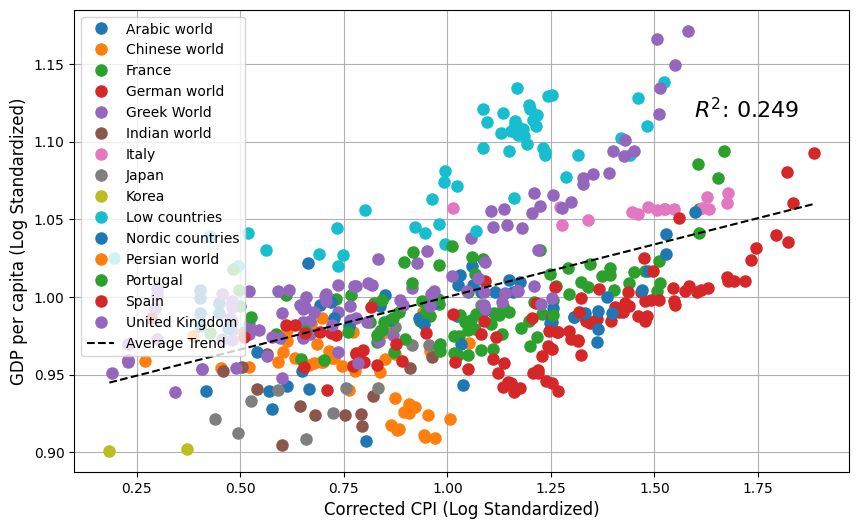

In [107]:
df_ols = df[['region_name', 'year', 'log_gdp_std', 'N_est_log_std', 'score_log_std']].copy()


# Mixed Effects Model
model = smf.mixedlm("log_gdp_std ~ N_est_log_std", df_ols, groups=df_ols["region_name"])
result = model.fit()


sm_table = result.summary().tables[1]
sm_table.index = ['Intercept', 'alpha', 'Group Var']
sm_table['model'] = 'Corrected CPI'
sm_table = sm_table.reset_index()
tables_dict['Corrected CPI'] = sm_table


# Output model summary to get R-square values if available (typically for OLS, not directly for MixedLM)
print(result.summary())

# Fitting an OLS model to obtain a single average trend line across all data
average_ols_model = smf.ols("log_gdp_std ~ N_est_log_std", data=df_ols).fit()
#average_ols_model = smf.mixedlm("log_gdp_std ~ N_est_log_std", df_ols, groups=df_ols["region_name"]).fit()
print(average_ols_model.summary())

# Prepare plot for relationship with a single average trend line
plt.figure(figsize=(10, 6))
for name, group in df_ols.groupby('region_name'):
    plt.plot(group['N_est_log_std'], group['log_gdp_std'], marker='o', linestyle='', ms=8, label=name)

# Calculate the average trend line across all data
x_vals = np.linspace(df_ols['N_est_log_std'].min(), df_ols['N_est_log_std'].max(), 100)
y_vals = average_ols_model.params['Intercept'] + average_ols_model.params['N_est_log_std'] * x_vals
plt.plot(x_vals, y_vals, 'k--', label='Average Trend')

plt.legend()
plt.xlabel('Corrected CPI (Log Standardized)', fontsize=12)
plt.ylabel('GDP per capita (Log Standardized)', fontsize=12)
plt.title('')
plt.grid(True)

# Show R-squared on the plot for the average trend line
r_squared = average_ols_model.rsquared
plt.figtext(0.85, 0.7, f'$R^2$: {r_squared:.3f}', ha='right', fontsize=16)

plt.show()

## CPI

/Users/charlesdedampierre/Desktop/cultura_project/.venv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_gdp_std
No. Observations: 508     Method:             REML       
No. Groups:       15      Scale:              0.0006     
Min. group size:  2       Log-Likelihood:     1133.6264  
Max. group size:  64      Converged:          Yes        
Mean group size:  33.9                                   
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.944    0.010 90.286 0.000  0.924  0.965
score_log_std   0.042    0.003 16.810 0.000  0.037  0.047
Group Var       0.002    0.025                           



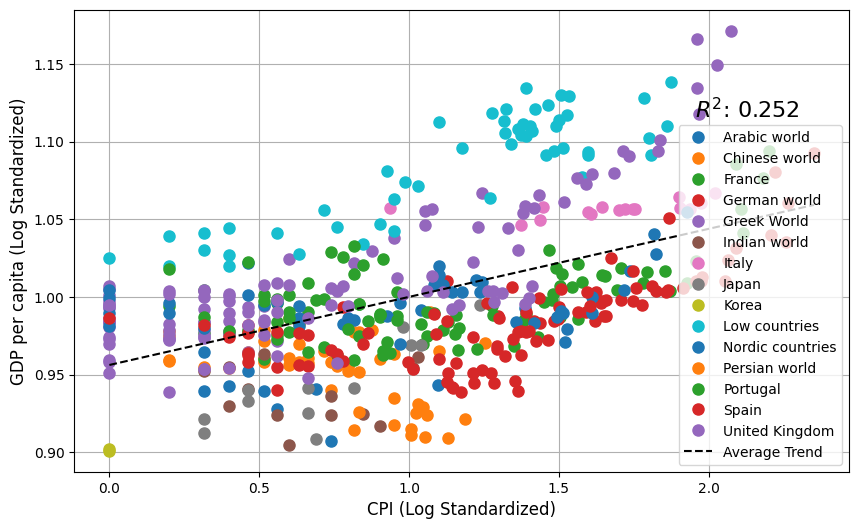

In [108]:
# Mixed Effects Model
model = smf.mixedlm("log_gdp_std ~ score_log_std", df_ols, groups=df_ols["region_name"])
result = model.fit()


sm_table = result.summary().tables[1]
sm_table.index = ['Intercept', 'alpha', 'Group Var']
sm_table['model'] = 'CPI'
sm_table = sm_table.reset_index()
tables_dict['CPI'] = sm_table

# Output model summary to get R-square values if available (typically for OLS, not directly for MixedLM)
print(result.summary())

# Fitting an OLS model to obtain a single average trend line across all data
average_ols_model = smf.ols("log_gdp_std ~ score_log_std", data=df_ols).fit()

# Prepare plot for relationship with a single average trend line
plt.figure(figsize=(10, 6))
for name, group in df_ols.groupby('region_name'):
    plt.plot(group['score_log_std'], group['log_gdp_std'], marker='o', linestyle='', ms=8, label=name)

# Calculate the average trend line across all data
x_vals = np.linspace(df_ols['score_log_std'].min(), df_ols['score_log_std'].max(), 100)
y_vals = average_ols_model.params['Intercept'] + average_ols_model.params['score_log_std'] * x_vals
plt.plot(x_vals, y_vals, 'k--', label='Average Trend')

plt.legend()
plt.xlabel('CPI (Log Standardized)', fontsize=12)
plt.ylabel('GDP per capita (Log Standardized)', fontsize=12)
plt.title('')
plt.grid(True)

# Show R-squared on the plot for the average trend line
r_squared = average_ols_model.rsquared
plt.figtext(0.85, 0.7, f'$R^2$: {r_squared:.3f}', ha='right', fontsize=16)

plt.show()

## Corrected CPI 1800-1880

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_gdp_std
No. Observations: 107     Method:             REML       
No. Groups:       15      Scale:              0.0003     
Min. group size:  2       Log-Likelihood:     252.9239   
Max. group size:  9       Converged:          Yes        
Mean group size:  7.1                                    
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.814    0.022 37.277 0.000  0.771  0.856
N_est_log_std   0.159    0.016 10.048 0.000  0.128  0.190
Group Var       0.002    0.049                           

                            OLS Regression Results                            
Dep. Variable:            log_gdp_std   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.515
Method:           

/Users/charlesdedampierre/Desktop/cultura_project/.venv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


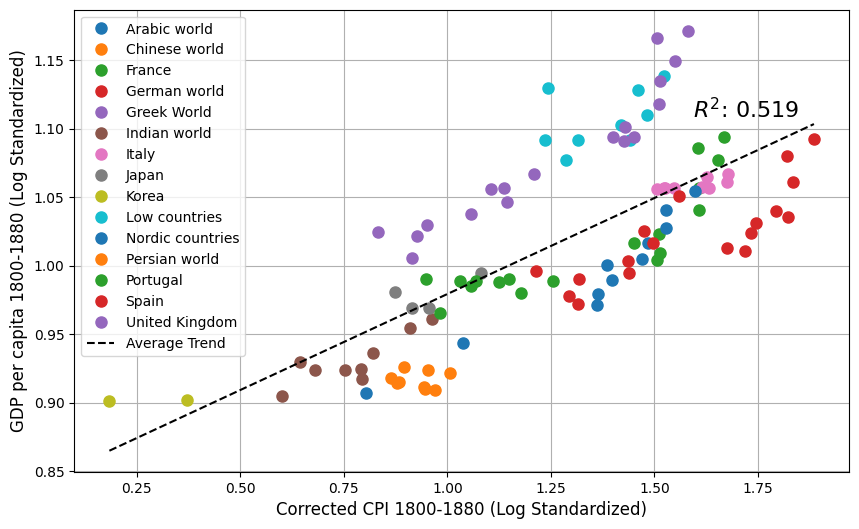

In [109]:
df_ols = df[['region_name', 'year', 'log_gdp_std', 'N_est_log_std', 'score_log_std']].copy()
df_ols = df_ols[df_ols['year']>=1800]
df_ols.region_name.value_counts()

# Mixed Effects Model
model = smf.mixedlm("log_gdp_std ~ N_est_log_std", df_ols, groups=df_ols["region_name"])
result = model.fit()

# Output model summary to get R-square values if available (typically for OLS, not directly for MixedLM)
print(result.summary())

sm_table = result.summary().tables[1]
sm_table.index = ['Intercept', 'alpha', 'Group Var']
sm_table['model'] = 'Corrected CPI 1800-1880'
sm_table = sm_table.reset_index()
tables_dict['Corrected CPI 1800-1880'] = sm_table


# Fitting an OLS model to obtain a single average trend line across all data
average_ols_model = smf.ols("log_gdp_std ~ N_est_log_std", data=df_ols).fit()
#average_ols_model = smf.mixedlm("log_gdp_std ~ N_est_log_std", df_ols, groups=df_ols["region_name"]).fit()
print(average_ols_model.summary())

# Prepare plot for relationship with a single average trend line
plt.figure(figsize=(10, 6))
for name, group in df_ols.groupby('region_name'):
    plt.plot(group['N_est_log_std'], group['log_gdp_std'], marker='o', linestyle='', ms=8, label=name)

# Calculate the average trend line across all data
x_vals = np.linspace(df_ols['N_est_log_std'].min(), df_ols['N_est_log_std'].max(), 100)
y_vals = average_ols_model.params['Intercept'] + average_ols_model.params['N_est_log_std'] * x_vals
plt.plot(x_vals, y_vals, 'k--', label='Average Trend')

plt.legend()
plt.xlabel('Corrected CPI 1800-1880 (Log Standardized)', fontsize=12)
plt.ylabel('GDP per capita 1800-1880 (Log Standardized)', fontsize=12)
plt.title('')
plt.grid(True)

# Show R-squared on the plot for the average trend line
r_squared = average_ols_model.rsquared


plt.figtext(0.85, 0.7, f'$R^2$: {r_squared:.3f}', ha='right', fontsize=16)

plt.show()



## CPI 1800-1880

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_gdp_std
No. Observations: 107     Method:             REML       
No. Groups:       15      Scale:              0.0003     
Min. group size:  2       Log-Likelihood:     250.5761   
Max. group size:  9       Converged:          Yes        
Mean group size:  7.1                                    
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.877    0.017 52.166 0.000  0.844  0.910
score_log_std   0.094    0.010  9.810 0.000  0.075  0.113
Group Var       0.002    0.045                           

                            OLS Regression Results                            
Dep. Variable:            log_gdp_std   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.524
Method:           

/Users/charlesdedampierre/Desktop/cultura_project/.venv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


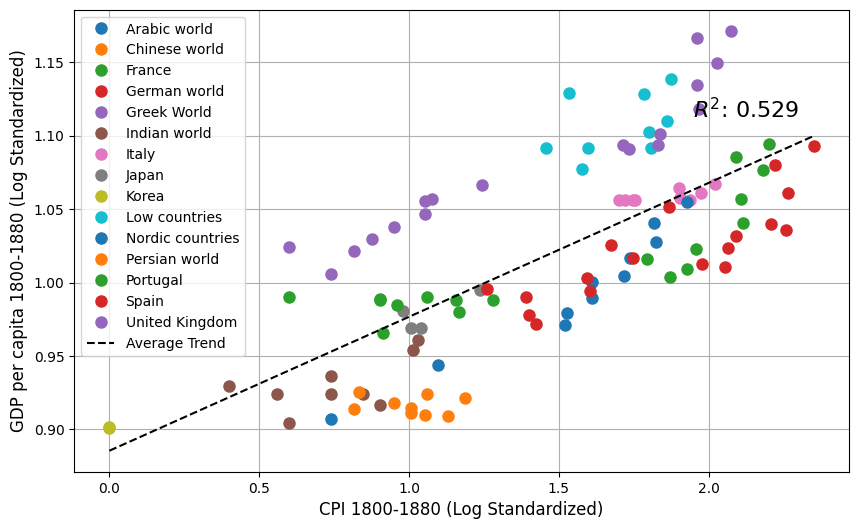

In [110]:
df_ols = df[['region_name', 'year', 'log_gdp_std', 'N_est_log_std', 'score_log_std']].copy()
df_ols = df_ols[df_ols['year']>=1800]
df_ols.region_name.value_counts()

# Mixed Effects Model
model = smf.mixedlm("log_gdp_std ~ score_log_std", df_ols, groups=df_ols["region_name"])
result = model.fit()

# Output model summary to get R-square values if available (typically for OLS, not directly for MixedLM)
print(result.summary())

sm_table = result.summary().tables[1]
sm_table.index = ['Intercept', 'alpha', 'Group Var']
sm_table['model'] = 'CPI 1800-1880'
sm_table = sm_table.reset_index()
tables_dict['CPI 1800-1880'] = sm_table


# Fitting an OLS model to obtain a single average trend line across all data
average_ols_model = smf.ols("log_gdp_std ~ score_log_std", data=df_ols).fit()
#average_ols_model = smf.mixedlm("log_gdp_std ~ N_est_log_std", df_ols, groups=df_ols["region_name"]).fit()
print(average_ols_model.summary())

# Prepare plot for relationship with a single average trend line
plt.figure(figsize=(10, 6))
for name, group in df_ols.groupby('region_name'):
    plt.plot(group['score_log_std'], group['log_gdp_std'], marker='o', linestyle='', ms=8, label=name)

# Calculate the average trend line across all data
x_vals = np.linspace(df_ols['score_log_std'].min(), df_ols['score_log_std'].max(), 100)
y_vals = average_ols_model.params['Intercept'] + average_ols_model.params['score_log_std'] * x_vals
plt.plot(x_vals, y_vals, 'k--', label='Average Trend')

plt.legend()
plt.xlabel('CPI 1800-1880 (Log Standardized)', fontsize=12)
plt.ylabel('GDP per capita 1800-1880 (Log Standardized)', fontsize=12)
plt.title('')
plt.grid(True)

# Show R-squared on the plot for the average trend line
r_squared = average_ols_model.rsquared


plt.figtext(0.85, 0.7, f'$R^2$: {r_squared:.3f}', ha='right', fontsize=16)

plt.show()

#### Stats Table

In [111]:
final_table = pd.concat(tables_dict.values(), ignore_index=True).reset_index(drop=True)
final_table = final_table[final_table['index']=='alpha']
final_table = final_table.drop(['index', 'z'], axis=1)
final_table = final_table.sort_values('Coef.', ascending=True)
final_table = final_table.rename(columns={'[0.025':'0.025', '0.975]':'0.975'})
list(final_table.columns)

final_table['Coef.'] = final_table['Coef.'].astype(float)
final_table['0.025'] = final_table['0.025'].astype(float)
final_table['0.975'] = final_table['0.975'].astype(float)
final_table['P>|z|'] = final_table['P>|z|'].astype(float)
final_table = final_table.reset_index(drop=True)
final_table


,Coef.,Std.Err.,P>|z|,0.025,0.975,model
0,0.042,0.003,0.0,0.037,0.047,CPI
1,0.063,0.004,0.0,0.055,0.071,Corrected CPI
2,0.094,0.010,0.0,0.075,0.113,CPI 1800-1880
3,0.159,0.016,0.0,0.128,0.190,Corrected CPI 1800-1880


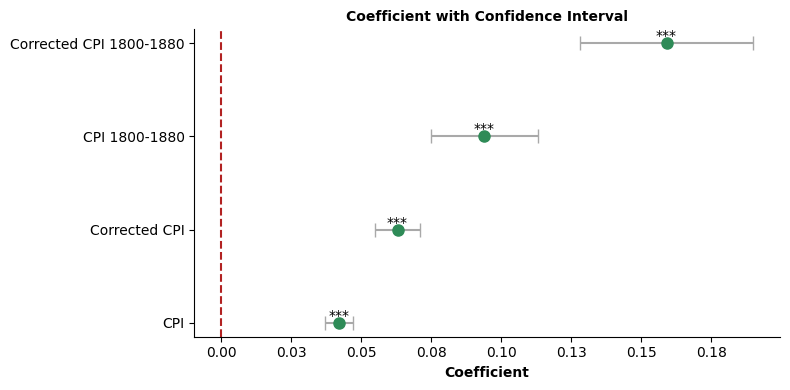

In [112]:
fig, ax = plt.subplots(figsize=(8, 4))  # Increased figure size for more models

# Plot the data points and error bars
ax.errorbar(final_table['Coef.'], final_table['model'], 
            xerr=[final_table['Coef.'] - final_table['0.025'], 
                  final_table['0.975'] - final_table['Coef.']],
            fmt='o', capsize=5, ecolor='darkgray', markersize=8, 
            color='seagreen', linewidth=1.5, zorder=2)

# Add a vertical line at x=0
ax.axvline(x=0, color='firebrick', linestyle='--', linewidth=1.5, zorder=1)

# Add *** on top of the green dots
for i, model in enumerate(final_table['model']):
    ax.text(final_table['Coef.'][i], model, '***', ha='center', va='bottom', color='black', fontsize=10)

# Customize the plot
ax.set_xlabel('Coefficient', fontweight='bold')
ax.set_ylabel('', fontweight='bold')
ax.set_title('Coefficient with Confidence Interval', fontsize=10, fontweight='bold')

# Adjust the x-axis to show more precision
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.2f}"))

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()